# הכנה

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f
from scipy.stats import norm
import math

In [2]:
data = pd.read_csv("loan_data.csv")

In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,gender,region
0,1,all_other,0.1253,83.67,9.761463,16.32,692,7320.000000,1245,31.1,0,0,0,0,female,Center
1,1,debt_consolidation,0.1496,692.90,10.896739,11.78,682,1709.958333,25216,59.9,1,0,0,0,male,Center
2,1,home_improvement,0.1218,499.50,12.075394,10.19,717,3840.000000,19315,72.1,2,0,0,0,male,Center
3,1,major_purchase,0.1253,87.02,10.616241,13.54,687,2159.958333,9847,24.1,1,0,0,0,female,East
4,1,educational,0.0894,158.86,9.729134,14.93,732,3569.958333,6109,43.9,1,0,0,0,female,South


# שאלה 1

In [4]:
print("Frequent:",data['not.fully.paid'].value_counts().idxmax())

Frequent: 0


In [5]:
grouped = data["not.fully.paid"].value_counts().reset_index()
grouped = grouped.rename(columns = {'index' : "not.fully.paid", "not.fully.paid" : 'Count'})
grouped

,not.fully.paid,Count
0,0,3257
1,1,754


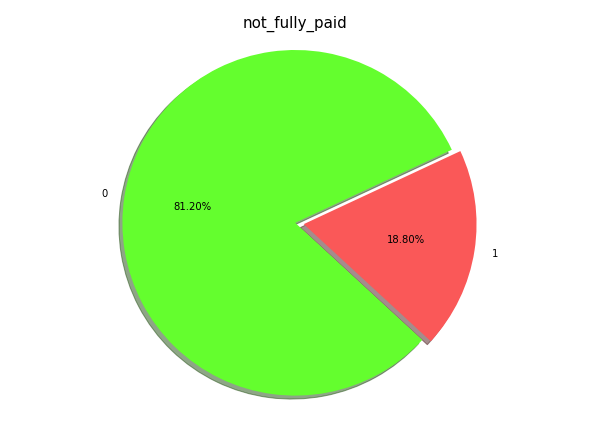

In [6]:
grouped = data["not.fully.paid"].value_counts().reset_index()
grouped = grouped.rename(columns = {'index' : "not.fully.paid", "not.fully.paid" : 'Count'})
colors = ["#64FE2E","#FA5858"]
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
not_fully_paid = grouped['not.fully.paid']
Count = grouped['Count']
plt.suptitle('not_fully_paid', fontsize=15)
ax.pie(Count, labels = not_fully_paid,autopct='%1.2f%%',explode=[0,0.05],shadow=True,
      colors=colors, startangle=25)
plt.show()




<font size="5">A large majority of people don't repay the loan in full</font>

# שאלה 2

In [7]:
print("Frequent:",data['region'].value_counts().idxmax())

Frequent: Center


In [8]:
grouped = data["region"].value_counts().reset_index()
grouped = grouped.rename(columns = {'index' : "region", "region" : 'Count'})
grouped

,region,Count
0,Center,1224
1,South,1047
2,East,924
3,West,816


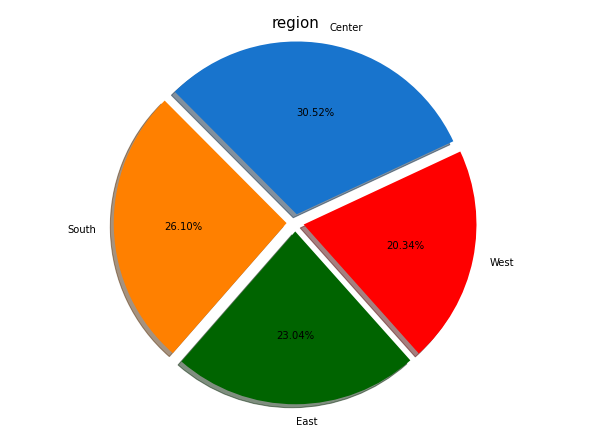

In [9]:
colors = ["#1874CD","#FF8000","#006400","#FF0000"]
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
region = grouped['region']
Count = grouped['Count']
plt.suptitle('region', fontsize=15)
ax.pie(Count, labels = region,autopct='%1.2f%%',explode=[0.05,0.05,0.05,0.05],shadow=True,
      colors=colors, startangle=25)
plt.show()

<font size="5">The most common geographic area is in the central area</font>

# שאלה 3

In [10]:
print("center measures")
print("Frequent:",data['revol.bal'].value_counts().idxmax())
print("Median:",data['revol.bal'].median())
print("Mean:",data['revol.bal'].mean())
print("Middle of range:",(data['revol.bal'].min()+data['revol.bal'].max())/2)


center measures
Frequent: 0
Median: 8153.0
Mean: 19382.92346048367
Middle of range: 476006.5


In [11]:
print("dispersion indices")
print("Range:",data['revol.bal'].max()-data['revol.bal'].min())
q3, q1 = np.percentile(data["revol.bal"], [75 ,25])
print("IQR:",q3 - q1)
print("Std:",data['revol.bal'].std())

dispersion indices
Range: 952013
IQR: 15305.5
Std: 40628.686675327976


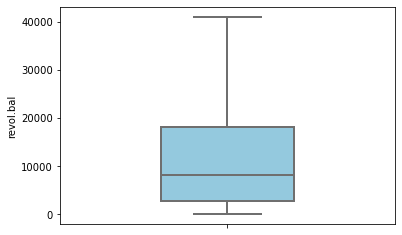

In [12]:
>>> b = sns.boxplot(data = data,           
                    y = "revol.bal",       # y axis column from data
                    width = 0.4,        # The width of the boxes
                    color = "skyblue",  # Box colour
                    linewidth = 2,      # Thickness of the box lines
                    showfliers = False)  # Sop showing the fliers

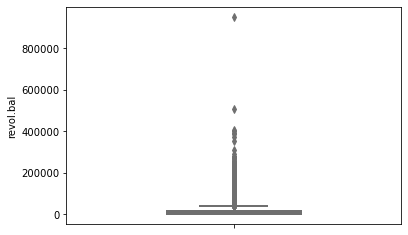

In [13]:
>>> b = sns.boxplot(data = data,           
                    y = "revol.bal",       # y axis column from data
                    width = 0.4,        # The width of the boxes
                    color = "skyblue",  # Box colour
                    linewidth = 2,      # Thickness of the box lines
                    showfliers = True)  # Sop showing the fliers

In [14]:
frequant_table =data[['revol.bal']].apply(pd.Series.value_counts, bins=[0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]).reset_index()

frequant_table.rename(columns = {'index':'x','revol.bal':'f'}, inplace = True)
frequant_table

,x,f
0,"(-0.001, 100000.0]",3860
1,"(100000.0, 200000.0]",100
2,"(200000.0, 300000.0]",42
3,"(300000.0, 400000.0]",5
4,"(400000.0, 500000.0]",2
5,"(500000.0, 600000.0]",1
6,"(900000.0, 1000000.0]",1
7,"(600000.0, 700000.0]",0
8,"(700000.0, 800000.0]",0
9,"(800000.0, 900000.0]",0


<font size="5">You can see the big difference between the mean and the median because of the outliers that are extreme</font>

# שאלה 4

In [15]:
print("center measures")
print("Frequent:",data['delinq.2yrs'].value_counts().idxmax())
print("Median:",data['delinq.2yrs'].median())
print("Mean:",data['delinq.2yrs'].mean())
print("Middle of range:",(data['delinq.2yrs'].min()+data['delinq.2yrs'].max())/2)

center measures
Frequent: 0
Median: 0.0
Mean: 0.18150087260034903
Middle of range: 6.5


In [16]:
print("dispersion indices")
print("Range:",data['delinq.2yrs'].max()-data['delinq.2yrs'].min())
q3, q1 = np.percentile(data["delinq.2yrs"], [75 ,25])
print("IQR:",q3 - q1)
print("Std:",data['delinq.2yrs'].std())

dispersion indices
Range: 13
IQR: 0.0
Std: 0.6228939308293724


Text(0.5, 1.0, 'Delay distribution of counts')

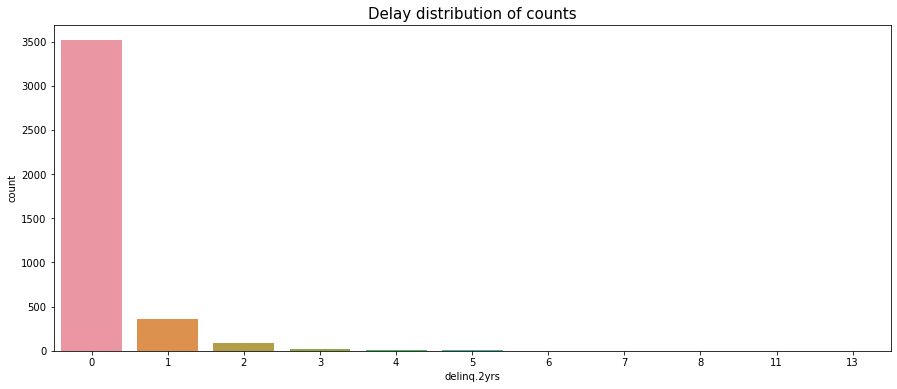

In [17]:
grouped = data["delinq.2yrs"].value_counts().reset_index()
grouped = grouped.rename(columns = {'delinq.2yrs' : "count", "index" : 'delinq.2yrs'})
plt.figure(figsize=(15,6))
sns.barplot(x='delinq.2yrs',y='count',data=grouped)
plt.title("Delay distribution of counts",size=15)

In [18]:
grouped

,delinq.2yrs,count
0,0,3516
1,1,360
2,2,89
3,3,24
4,4,12
5,5,5
6,13,1
7,6,1
8,7,1
9,8,1


<font size="5">It can be seen that the distribution is long tail right and that mostly people are not late in payment</font>

# שאלה 5

In [19]:
zero_creditors = data[data["inq.last.6mths"] == 0]["fico"].tolist()
one_to_five_creditors = data[data["inq.last.6mths"].between(1, 5)]["fico"].tolist()
six_and_more_creditors = data[data["inq.last.6mths"] >= 6]["fico"].tolist()

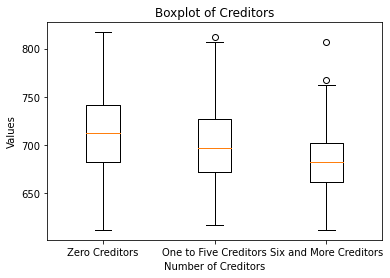

In [20]:
# Data for the boxplot
data_box = [zero_creditors, one_to_five_creditors, six_and_more_creditors]

# Boxplot labels
labels = ['Zero Creditors', 'One to Five Creditors', 'Six and More Creditors']

# Create the boxplot
plt.boxplot(data_box, labels=labels)

# Add title and axis labels
plt.title('Boxplot of Creditors')
plt.xlabel('Number of Creditors')
plt.ylabel('Values')

# Show the plot
plt.show()

In [21]:

# Python program to get average of a list
def Average(lst,str):
     print(f"Average of {str} =", round(sum(lst) / len(lst), 2))
 
Average(zero_creditors,"zero_creditors")
Average(one_to_five_creditors,"one_to_five_creditors")
Average(six_and_more_creditors,"six_and_more_creditors")


Average of zero_creditors = 714.17
Average of one_to_five_creditors = 700.89
Average of six_and_more_creditors = 684.43


In [22]:
# Combine the data into one array
all_data = np.concatenate([zero_creditors, one_to_five_creditors, six_and_more_creditors])

# Calculate the group means
group_means = [np.mean(zero_creditors), np.mean(one_to_five_creditors), np.mean(six_and_more_creditors)]

# Calculate the overall mean (grand mean)
grand_mean = np.mean(all_data)

# Calculate SSB
SSB = sum([(len(lst) * (mean - grand_mean)**2) for lst, mean in zip([zero_creditors, one_to_five_creditors, six_and_more_creditors], group_means)])

# Number of groups (lists)
k = 3

# Total number of observations
total_observations = len(all_data)

# Calculate DF between and DF within
DF_between = k - 1
DF_within = total_observations - k

# Calculate MSB
MSB = SSB / DF_between

# Calculate MSW
MSW = sum([(x - mean)**2 for lst, mean in zip([zero_creditors, one_to_five_creditors, six_and_more_creditors], group_means) for x in lst]) / DF_within

# Calculate F-statistic
F = MSB / MSW

# Calculate the p-value using the F-distribution
Pvalue = 1 - f.cdf(F, DF_between, DF_within)

# Print the results
print("SSB:", SSB)
print("DF between:", DF_between)
print("MSB:", MSB)
print("DF within:", DF_within)
print("MSW:", MSW)
print("F:", F)
print("P-value:", Pvalue)


SSB: 315824.7037104229
DF between: 2
MSB: 157912.35185521145
DF within: 4008
MSW: 1417.809392646862
F: 111.37770187881887
P-value: 1.1102230246251565e-16


<font size="5">Conclusion:<br>
    We reject the null hypothesis, you can see that the p-value is much smaller than 5% which means There is a difference in the credit score expectancy (fico) between people who have not been approached by creditors, people who have been approached by few creditors (1-5 times) and people who have been approached by many creditors.</font>

# שאלה 6

In [23]:
sample_proportion = round(sum(data["not.fully.paid"]==1)/len(data["not.fully.paid"]),2)
sample_size = len(data)
print("Proportion of people who do not repay the loan in full from all people:",sample_proportion)

Proportion of people who do not repay the loan in full from all people: 0.19


<font size="5">There is no need to test hypotheses as soon as the sample proportion is larger while you want to check that the proportion is smaller.</font>

In [24]:
print(sample_size*sample_proportion)
print(round(sample_size*(1-sample_proportion),2))
print("Its bigger than 10")

762.09
3248.91
Its bigger than 10


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm


n = sample_size   
p_hat = sample_proportion
P_0 = 0.05


# Step 2: Create a binomial distribution object
binomial_dist = binom(n, p_hat)

# Step 3: Calculate the mean and standard deviation of the binomial distribution
mean = p_hat
std_dev = math.sqrt((p_hat*(1-p_hat)/n))

# Step 4: Create a normal distribution object
normal_dist = norm(loc=mean, scale=std_dev)

In [26]:
Z_c = round((p_hat-P_0)/math.sqrt((P_0*(1-P_0))/n),2)
print("Z_c: ", Z_c)

Z_c:  40.68


In [27]:
import scipy.stats as stats

p_value =  stats.norm.cdf(Z_c)
print("p-value:", p_value)


p-value: 1.0


<font size="5">There is no minimum level of significance at which we would reject the null hypothesis.
</font>

# שאלה 7

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm


n = sample_size   
p_hat = sample_proportion
P_0 = 0.10


# Step 2: Create a binomial distribution object
binomial_dist = binom(n, p_hat)

# Step 3: Calculate the mean and standard deviation of the binomial distribution
mean = p_hat
std_dev = math.sqrt((p_hat*(1-p_hat)/n))

# Step 4: Create a normal distribution object
normal_dist = norm(loc=mean, scale=std_dev)

In [29]:
Z_c = round((p_hat-P_0)/math.sqrt((P_0*(1-P_0))/n),2)
print("Z_c: ", Z_c)

Z_c:  19.0


In [30]:
import scipy.stats as stats

p_value = 1 - stats.norm.cdf(Z_c)
print("p-value:", p_value)

p-value: 0.0


<font size="5">At any level of significance we will reject the null hypothesis</font>

# שאלה 8

In [31]:
m_0 = 3.5
x_roof = round(data["inq.last.6mths"].mean(),2)



data2 = data["inq.last.6mths"].tolist()
n = len(data2)
mean = np.mean(data2)
squared_diff = [(x - mean) ** 2 for x in data2]
sample_variance = sum(squared_diff) / (n - 1)
s = np.sqrt(sample_variance)






print("m_0: ",m_0 )
print("x_roof: ",x_roof )
print("s: ",s)

m_0:  3.5
x_roof:  2.26
s:  2.9132976261846495


In [32]:
from scipy.stats import t

significance_level = 0.05
degrees_of_freedom = n-1


critical_t_score = t.ppf(significance_level, degrees_of_freedom)

t_obs = round((x_roof-m_0)/(s/math.sqrt(n)),2)





print("Critical t-score:", critical_t_score)
print("t_obs: ",t_obs)


Critical t-score: -1.6452337075933792
t_obs:  -26.96


<font size="5">In left hypothesis, the critical value  less than the discovered value means to reject the null hypothesis </font>

# שאלה 9

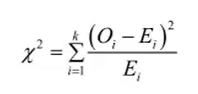

In [33]:
from IPython.display import Image, display
display(Image(filename='Explain2.png'))

In [34]:
# Create the Observed contingency table
observed_table = pd.crosstab(data['credit.policy'], data['region'], margins=True, margins_name="Total")





# Style the table for better formatting
styled_table = observed_table.style.format("{:.0f}").set_properties(**{'text-align': 'center'})

print("Observed Table")

# Display the styled Observed table with percentages and row/column sums
display(styled_table)




# Calculate the Expected contingency table by assuming independence
expected_table = observed_table.copy()

# Calculate expected values for each cell
for row in expected_table.index[:-1]:
    for col in expected_table.columns[:-1]:
        expected_val = (expected_table.at[row, "Total"] * expected_table.at["Total", col]) / expected_table.at["Total", "Total"]
        expected_table.at[row, col] = expected_val

# Style the Expected table for better formatting as integers
styled_expected_table = expected_table.iloc[:-1, :-1].style.format("{:.0f}").set_properties(**{'text-align': 'center'})


from scipy.stats import chi2_contingency
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(observed_table.iloc[:-1, :-1].values)

# Style the Expected table for better formatting as integers
styled_expected_table = expected_table.iloc[:-1, :-1].style.format("{:.0f}").set_properties(**{'text-align': 'center'})

print("Expected")
# Display the styled Expected table with row/column sums
display(styled_expected_table)

styled_df = styled_expected_table.data  # Convert the Styler object back to a DataFrame
rows, columns = styled_df.shape
df = (rows-1) * (columns-1)
alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, df)



# Display the chi-squared test results
print("Degrees of Freedom:", df)
print("Chi-Squared Value:", chi2)
print("Critical Value:", critical_value)
print("P-Value:", p)

Observed Table


region,Center,East,South,West,Total
credit.policy,,,,,
0,537,405,459,360,1761
1,687,519,588,456,2250
Total,1224,924,1047,816,4011


Expected


region,Center,East,South,West
credit.policy,,,,
0,537,406,460,358
1,687,518,587,458


Degrees of Freedom: 3
Chi-Squared Value: 0.01937121873186496
Critical Value: 7.814727903251179
P-Value: 0.9992870948081555


<font size="5">There is no correlation between region and credit.policy</font>

# שאלה 10

In [35]:
T1 = data["log.annual.inc"].mean()/2
T2 = float(data["log.annual.inc"].sample(1))+1
print("T1: ", T1)
print("T2: ",  T2)

T1:  5.4638480109452985
T2:  11.37349118


In [36]:
true_mean = data["log.annual.inc"].mean()
sample_variance = np.var(data["log.annual.inc"], ddof=1)


print("m:", true_mean)
print("Sample Variance:", sample_variance)

m: 10.927696021890597
Sample Variance: 0.4489871018655286


In [37]:
estimated_value_1 = data["log.annual.inc"].mean()/2
estimated_value_2 = float(data["log.annual.inc"].sample(1))+1

true_mean = data["log.annual.inc"].mean()

sample_variance = np.var(data["log.annual.inc"], ddof=1)

bias_1 = estimated_value_1 - true_mean
bias_2 = estimated_value_2 - true_mean

# Calculate mean squared error (MSE)
mse_1 = np.mean((estimated_value_1 - true_mean) ** 2)
mse_2 = np.mean((estimated_value_2 - true_mean) ** 2)

# Display the results
print("Estimated Value 1:")
print("T_1:", estimated_value_1)
print("Variance:", sample_variance)
print("Bias:", bias_1)
print("MSE:", mse_1)

print("\nEstimated Value 2:")
print("T_2:", estimated_value_2)
print("Variance:", sample_variance)
print("Bias:", bias_2)
print("MSE:", mse_2)


Estimated Value 1:
T_1: 5.4638480109452985
Variance: 0.4489871018655286
Bias: -5.4638480109452985
MSE: 29.853635086710895

Estimated Value 2:
T_2: 12.28978191
Variance: 0.4489871018655286
Bias: 1.3620858881094033
MSE: 1.855277966586782


<font size="5">Even though the second estimator looks very strange because the standard deviation is relatively low, it is better than the estimator that divides the average by 2 and lowers it dramatically (you can see this according to the MSE)</font>

# שאלה 11

In [38]:
# Calculate the unbiased estimator of the standard deviation
sample_mean = round(data['log.annual.inc'].mean(),2)
n = len(data)
unbiased_std = round(np.sqrt(((data['log.annual.inc'] - sample_mean)**2).sum() / (n - 1)),2)
your_column_values = data['log.annual.inc'].sample(n=3).tolist()
x_1 = your_column_values[0]
x_2 = your_column_values[1]
x_3 = your_column_values[2]
data1 = np.array([x_1, x_2, x_3])
mu_mle = round(np.mean(data1),2)




print("Unbiased Estimator of Standard Deviation:", unbiased_std)
print("3 Random Values:", x_1, x_2, x_3)
print("Maximum Likelihood Estimate for mean:", mu_mle)
print("Sample Mean:", sample_mean)

Unbiased Estimator of Standard Deviation: 0.67
3 Random Values: 10.81977828 10.30949651 10.15767851
Maximum Likelihood Estimate for mean: 10.43
Sample Mean: 10.93


<font size="5">Our estimator from 3 points is very close to the sample mean and this is because the standard deviation is relatively low</font>

# שאלה 12

In [39]:
# Calculate the sample size
sample_size = len(data)

# Calculate the number of people who did not repay the loan in full (1)
not_paid_count = data["not.fully.paid"].sum()

# Calculate the proportion of people who did not repay the loan in full
proportion_not_paid = not_paid_count / sample_size

# 1. Most Common Estimator
most_common_estimator = proportion_not_paid

# 2. Conservative Estimator (using Wilson Score Interval)
from statsmodels.stats.proportion import proportion_confint
conf_interval = proportion_confint(not_paid_count, sample_size, method='wilson')
conservative_estimator = conf_interval[1] 



# 3. High MSE Estimator (using simple sample mean)
sample_mean_estimator = math.sqrt(data["not.fully.paid"].mean())

print("Proportion of people not repaying loan in full:", round(proportion_not_paid,3))
print("1. Most Common Estimator:", round(most_common_estimator,3))
print("2. Conservative Estimator (upper value Wilson Score Interval):", round(conservative_estimator,3))
print("3. High MSE Estimator (Square Root):", round(sample_mean_estimator,3))


Proportion of people not repaying loan in full: 0.188
1. Most Common Estimator: 0.188
2. Conservative Estimator (upper value Wilson Score Interval): 0.2
3. High MSE Estimator (Square Root): 0.434


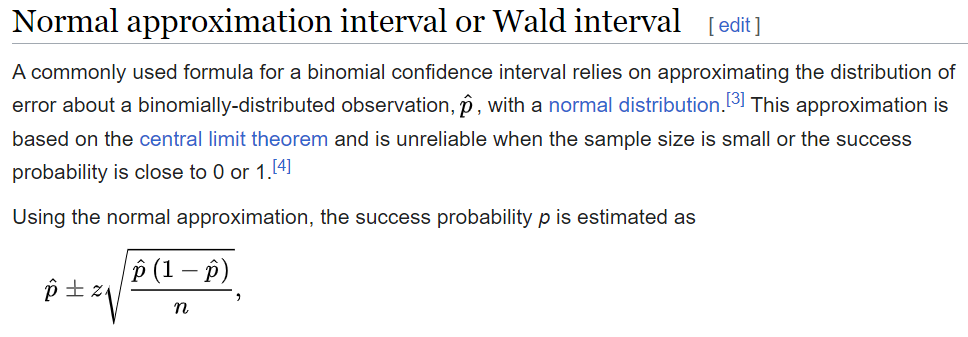

In [40]:
from IPython.display import Image, display
display(Image(filename='Explain.png'))